# Weighted ECM clustering vs Traditional ECM clustering
### With Forest-Type (UCI dataset)

In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, plotting, calculate_non_specificity
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from evclust.datasets import load_thyroid

Instances: 215; Features: 5; Clusters: class    3
dtype: int64
    f1    f2   f3   f4   f5
0  107  10.1  2.2  0.9  2.7
1  113   9.9  3.1  2.0  5.9
2  127  12.9  2.4  1.4  0.6
3  109   5.3  1.6  1.4  1.5
4  105   7.3  1.5  1.5 -0.1


D:\vtdo\projects\evclust\src\evclust\utils.py:1089: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


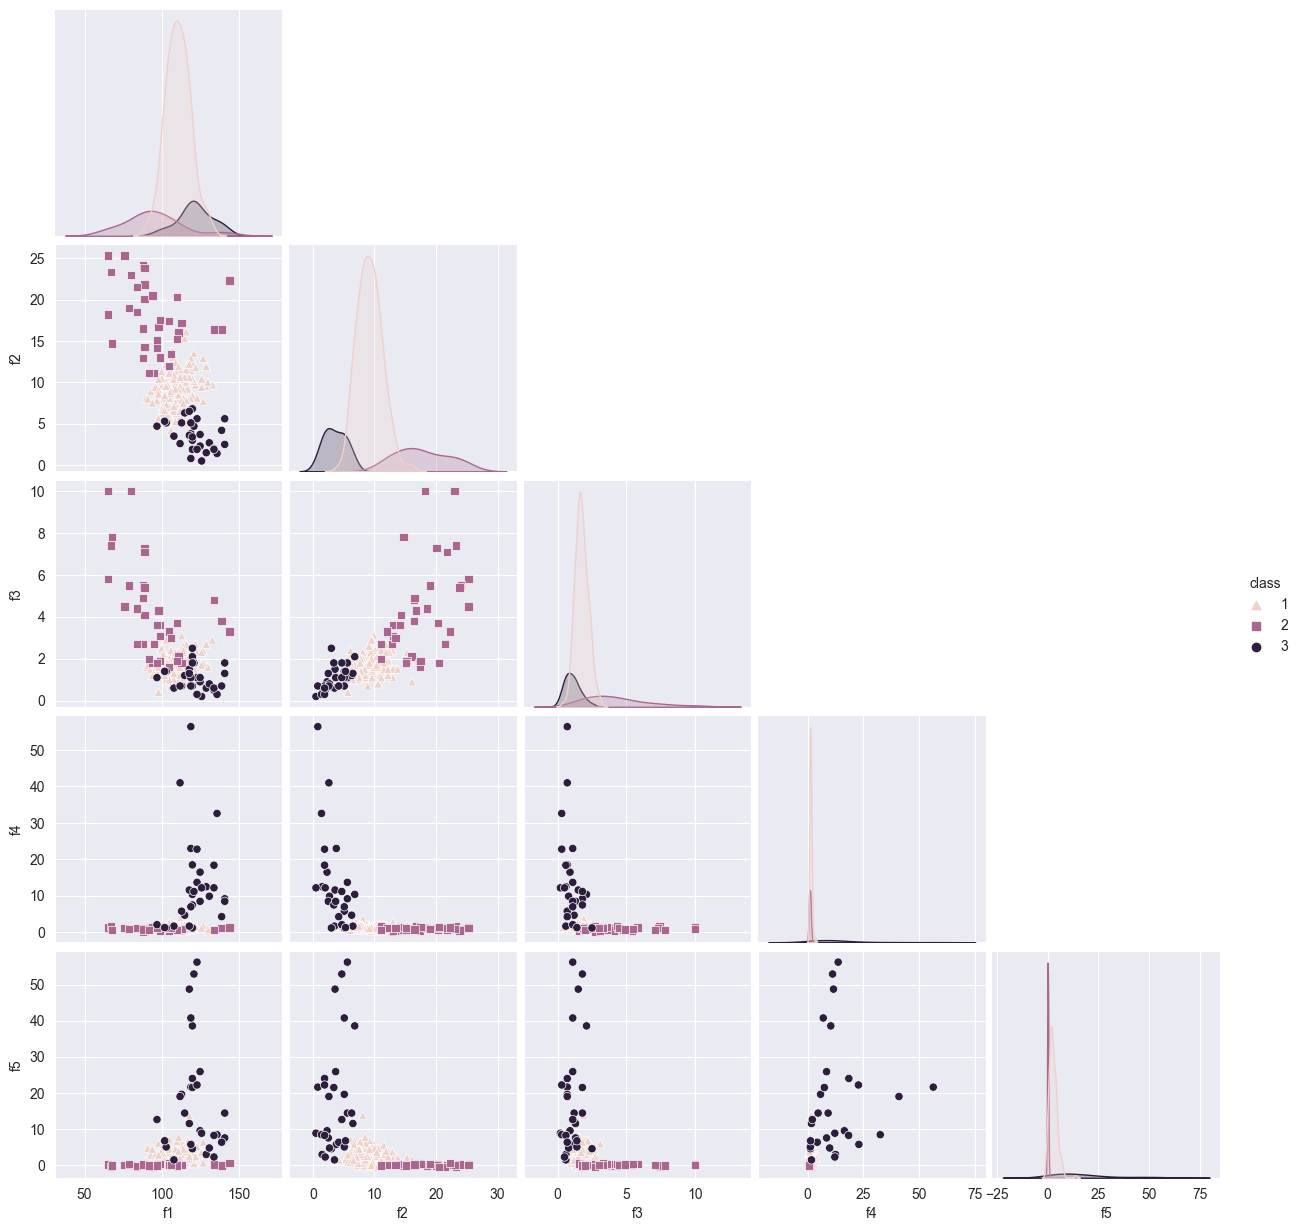

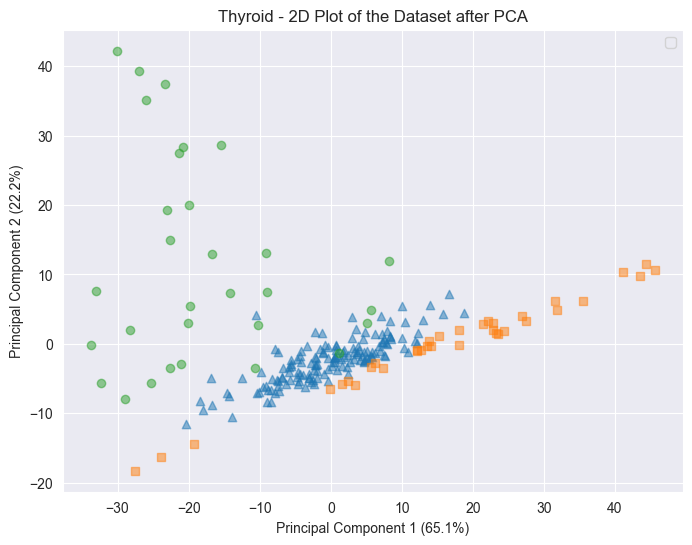

Instances: 215; Features: 5; Clusters: class    3
dtype: int64


In [2]:
### Thyroid dataset
# fetch dataset 
thyroid = load_thyroid()

# data (as pandas dataframes) 
X = thyroid.iloc[:, 1:]
y = pd.DataFrame(thyroid.iloc[:, 0])

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

markers = ['^', 's', 'o']
plotting(X, y, "Thyroid", matrix_plot=True, markers=markers)
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])


## Traditional ECM

In [17]:
# %%capture
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=1, init="kmeans")
    model_list = np.append(model_list, model)

model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

[1, 4.726964407518636]
[2, 4.582648616760805]
[3, 4.53861059286568]
[4, 4.519030488313962]
[5, 4.50995619631785]
[6, 4.505739602666958]
[7, 4.503741770318912]
[8, 4.502758197510652]
[1, 4.726964407518636]
[2, 4.582648616760805]
[3, 4.53861059286568]
[4, 4.519030488313962]
[5, 4.50995619631785]
[6, 4.505739602666958]
[7, 4.503741770318912]
[8, 4.502758197510652]
[1, 4.726964407518637]
[2, 4.582648616760805]
[3, 4.538610592865681]
[4, 4.5190304883139625]
[5, 4.50995619631785]
[6, 4.505739602666958]
[7, 4.503741770318913]
[8, 4.502758197510652]
[1, 4.726964407518636]
[2, 4.582648616760805]
[3, 4.538610592865681]
[4, 4.519030488313962]
[5, 4.50995619631785]
[6, 4.505739602666958]
[7, 4.503741770318913]
[8, 4.502758197510652]
[1, 4.726964407518636]
[2, 4.582648616760805]
[3, 4.538610592865681]
[4, 4.5190304883139625]
[5, 4.50995619631785]
[6, 4.505739602666958]
[7, 4.503741770318912]
[8, 4.502758197510653]
[1, 4.726964407518637]
[2, 4.582648616760805]
[3, 4.538610592865681]
[4, 4.5190304883

J values: [4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510653, 4.502758197510653]
ARI values: [0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282]
NS values: [1.7172190556109885, 1.7172190556109885, 1.765982059115153, 1.3952970088049543, 1.765982059115153, 1.765982059115153, 1.765982059115153, 1.7172190556109885, 1.7071153779681334, 1.7071153779681334]
NMI values: [0.7177567243150124, 0.7177567243150124, 0.7177567243150124, 0.7177567243150123, 0.7177567243150124, 0.7177567243150124, 0.7177567243150124, 0.7177567243150124, 0.7177567243150124, 0.7177567243150124]
Average ARI values: 0.765296460087282
Average Non-specificity: 1.70251131680348
Average Normalized mutual infor: 0.7177567243150123
Center: [[ 0.784941    0.13684373  0.063853

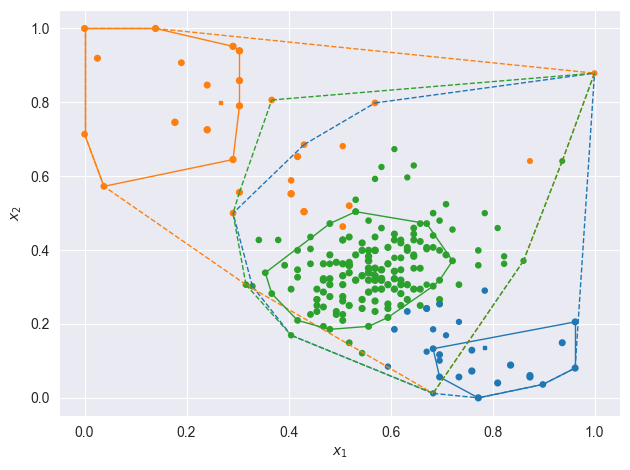

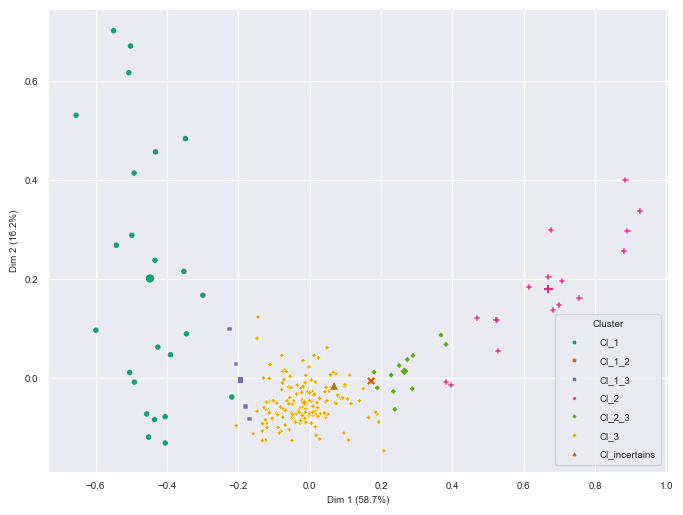

In [18]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")
print(f"Center: {model_list[0]['g']}")
# Plotting the the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

## Weighted ECM (WECM)

In [14]:
# %%capture
# Weighted ECM clustering
model_list = np.array([])
c = 3
d = X.shape[1]
for i in range(10):
    W = np.ones((c, d)) * (1/d)
    # W = None
    g0 = None
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, g0=g0, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, ntrials=1, init="kmeans", stopping_factor="center")
    model_list = np.append(model_list, model)

model_list = sorted(model_list, key=lambda model: model['crit'])

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

Initial weights: 
 [[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
---------Iteration #1---------
Initial prototypes: 
 [[0.57202095 0.36626344 0.16502463 0.02141647 0.05604961]
 [0.76664832 0.10887097 0.07897072 0.28681751 0.37070938]
 [0.23347398 0.80174731 0.55895692 0.01628182 0.01111111]]
[1, 0.12483009789920475]
[2, 0.07347515018799426]
[3, 0.057829273883680435]
[4, 0.05372673128995741]
[5, 0.051419121543220404]
[6, 0.05022567308097502]
[7, 0.04915166165115869]
[8, 0.048140270955097146]
[9, 0.04716346134902158]
[10, 0.0462062438733432]
[11, 0.045257279179375345]
[12, 0.0443063953210638]
[13, 0.043343753652457954]
[14, 0.042359501643356896]
[15, 0.041343484354078065]
[16, 0.04028496723879032]
[17, 0.039172681787193186]
[18, 0.037995495625114846]
[19, 0.03595532479159449]
[20, 0.03450680104779292]
[21, 0.03314516664190237]
---------End Iteration #1---------
Initial weights: 
 [[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
---------Iterat

J values: [0.03314516664190235, 0.03314516664190235, 0.03314516664190235, 0.03314516664190235, 0.03314516664190237, 0.03314516664190237, 0.03314516664190237, 0.03314516664190237, 0.033145166641902375, 0.033145166641902375]
ARI values: [0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191, 0.4147916541169191]
NS values: [0.7255455960196286, 0.7255455960196286, 0.7255455960196286, 1.2294396406552595, 0.8501776364586527, 0.8501776364586527, 0.8501776364586527, 0.8501776364586527, 0.9075278915891907, 1.222714238112324]
NMI values: [0.49278731736710085, 0.49278731736710085, 0.49278731736710085, 0.49278731736710074, 0.49278731736710074, 0.49278731736710074, 0.49278731736710074, 0.49278731736710074, 0.4927873173671008, 0.49278731736710074]
Average ARI values: 0.4147916541169191
Average Non-specificity: 0.8937029104250271
Average Normalized mutual infor: 0.4927873173671

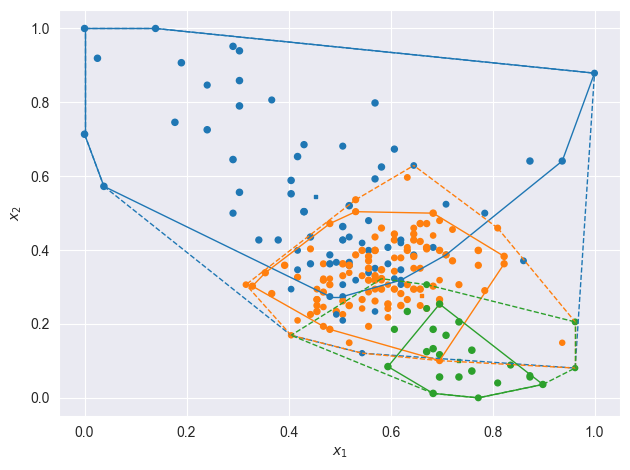

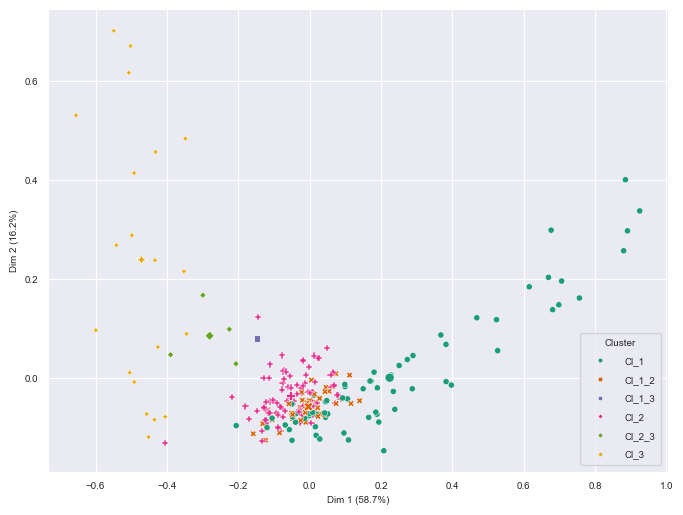

In [15]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")

# Plotting PCA of the best model
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

In [16]:
print(model_list[0]['W']) 

[[0.02081033 0.02436656 0.00828811 0.49583776 0.45069723]
 [0.00618765 0.0117194  0.15889319 0.54477127 0.2784285 ]
 [0.23954301 0.30681001 0.42801657 0.01340836 0.01222205]]
